
![Global Terrorism Banner](./Assets/Banner1.png)


The following is an analysis of global terrorist attacks from 1970 until 2015. It features detailed textual analysis, visual exploration, as well as modeling using various machine learning algorithms.

For more information, visit the [GTD website](https://www.start.umd.edu/gtd/), the [kaggle webpage](https://www.kaggle.com/START-UMD/gtd), or feel free to reach out to me!<br>

### **I highly recommend using my kaggle [submission](https://www.kaggle.com/mm5631/predicting-casualties-eda-visual-exploration/)** of this notebook as some content isn't rendered on github. 
<br>


# Table of Contents:

I. [Introduction](#I---Introduction)
1. [Context](#Context)
2. [Aims and Objectives](#Aims-and-Objectives)
3. [Data Dictionary](#Data-Dictionary)

II. [Pre-Processing](#II---Pre-Processing)
1. [Describing the Data](#Describing-the-Data)
2. [Cleaning the Data](#Cleaning-the-Data)
3. [Categorizing Perpetrators](#Categorizing-Perpetrators)
4. [Categorizing Targets](#Categorizing-Targets)
5. [Filling Missing Data](#Filling-Missing-Data)

III. [Exploratory Data Analysis](#III---Exploratory-Data-Analysis)

1. [Visual Exploration](#Visual-Exploration)
    - [Casualties by Year](#Casualties-by-Year)
    - [Casualties by Region](#Casualties-by-Region)
    - [Casualties and Attacks by Country](#Casualties-and-Attacks-by-Country)
    - [Top Perpetrators](#Top-Perpatrors)
    - [Terror Attacks by Weapon Type](#Terror-Attacks-by-Weapon-Type)
    - [Terror Tactics throught the Years](#Terror-Tactics-throughout-the-Years)
    <br><br>
        
2. [Feature Analysis](#Feature-Analysis)
    - [Feature Selection](#Feature-Selection)
    - [Target Selection](#Target-Selection)
    - [Feature Importance](#Feature-Importance)
        - [PCA](#Principal-Component-Analysis)
        - [Chi2](#Chi2)
        - [Scoring Metrics](#Scoring-Metrics)
        - [Model Selection](#Model-Selection)
        

IV. [Predictive Analysis](#IV---Predictive-Analysis)
1. [Model Calibration](#Model-Calibration)
 - [Logistic Regression](#Logistic-Regression)
 - [SGD Classifier](#SGD-Classifier)
 - [Linear SVC](#Linear-SVC)
 - [Random Forest Classifier](#Random-Forest-Classifier)
 - [Multi-Layer Perceptron](#Multi-Layer-Perceptron)
    <br><br>

2. [Performance Summary](#Performance-Summary)
    - [Score Table](#Score-Table)
    - [Feature Coefficients](#Feature-Coefficients)
    - [Confusion Matrices](#Confusion-Matrices)
    - [ROC Curves](#ROC-Curves)


V. [Appendix](#VII---Appendix)
- [Plot Confusion Matrix](#Plot-Confusion-Matrix)
- [Plot Cummulative Variance](#Plot-Confusion-Matrix)
- [Plot ROC Curve](#Plot-ROC)
    

# I - Introduction

[Table of Contents](#Table-of-Contents:)

## Context
[Table of Contents](#Table-of-Contents:)

*"It is two and a half minute to midnight" reads the Doomsday clock.*

The past few decades have been painted with growing geo-political instability across the world and terrorism has been one of the main ways through which this global decay manifested itself.

In recent years, increased access to technology has allowed the average individual to get a deeper insight in what terror acts occurring around the world. As such, terrorism attacks have been increasingly mediatized. I thought it would be interesting to explore what is all over the news from another approach, a more methodic one so to say.


The Global Terrorism  Database (GTD) records terror attacks around the world from 1970 through 2015, it includes systematic data on domestic and international terrorist incidents durint this time period. 

- Contains information on over 150,000 terrorist attacks

- Currently the most comprehensive unclassified data base on terrorist events in the world

- Includes information on more than 75,000 bombings, 17,000 assassinations, and 9,000 kidnappings since 1970

- Includes information on at least 45 variables for each case, with more recent incidents including information on more than 120 variables

- Over 4,000,000 news articles and 25,000 news sources were reviewed to collect incident data from 1998 to 2015 alone

---

For the purpose of this study,  the data analyzed will be strictly restricted to attacks that satisfy the three criteria per the Codebook guidelines.

> **CRITERIA 1 : POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL**

>The violent act must be aimed at attaining a political, economic, religious, or social goal. This criterion is not satisfied in those cases where the perpetrator(s) acted out of a pure profit motive or from an idiosyncratic personal motive unconnected with broader societal change

> **CRITERIA 2 : INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)**

> To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims. Such evidence can include (but is not limited to) the following: pre‐ or post‐attack statements by the perpetrator(s), past behavior by the perpetrators, or the particular nature of the target/victim, weapon, or attack type.

> **CRITERIA 3 : OUTSIDE INTERNATIONAL HUMANITARIAN LAW**

> The action is outside the context of legitimate warfare activities, insofar as it targets non‐combatants (i.e. the act must be outside the parameters permitted by international humanitarian law as reflected in the Additional Protocol to the Geneva Conventions of 12 August 1949 and elsewhere).

## Aims and Objectives
[Table of Contents](#Table-of-Contents:)

This notebook aims to explore the global terrorism database in two ways:
- Visually exploring the extremely rich data on the 150,000 terrorist attacks, trying to answer questions such as:
    
    - Which countries/region are the most targeted?
    
    - Where are there the most casualties?
    
    - How have casualties evolved throughout the years?
    
    - What are the casualties by weapon type?
    
    - Are certain nationalities more targeted?
    
    - Are some countries better at defending themselves against terrorist attacks?
    
    
- Analyze the data using scikit learn's classification library:
    
    - Can we predict if a terrorist attacks will result in casualties or yield no death and wounded.
    
    - If so, which model will be the most appropriate, should we use linear models, ensemble, support vector machines or neural networks?
    
    - How accurate will they be? How do we determine our scoring metrics?
    
    - Can we delve deeper by predicting thresholds of casualties? Will an attack be devastating or benign?
    
    - What about predicting the future? Can we get descent results running an ARIMA model?



Now let's look at this database!

## Data Dictionary
[Table of Contents](#Table-of-Contents:)

Here is a quick look at the data that will be used in this notebook, the complete descriptions can be found in the [codebook.](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)

```
## Spatio-Temporal Variables:

'iyear'            : year of the incident
'imonth'           : month of the incident
'iday'             : day of the incident

'latitude'         : latitude of the incident
'longitude'        : longitude of the incident

## Continous variables: 

'nkill'            : number of dead
'nwound'           : number of wounded

## Binary Variables:

'crit1'            : was the attack aimed at attaining a political, economic, religious, or social goal?
'crit2'            : was there intent to coerce or intimidate a larger audience than the victims?
'crit3'            : was the incident outside legitimate warfare activities (i.e. target non-combattants)?
'doubtter'         : aws there doubt as to whether or not the incident is a terrorist attack

'extended'         : has the incident lasted for more than 24 hours?
'multiple'         : is the incident connected to other attacks?
'success'          : did the terrorist attack achieve its goal (i.e. assassination, etc.)?
'suicide'          : did the incident involve a suicide attack?
'guncertain1'      : was the terrorist group confirmed?
'claimed'          : was the incident claimed by a particular group?
'property'         : was property damaged during the attack?
'ishostkid'        : were victims taken hostages or kidnapped?

## Categorical Variables:

'country_txt'      : country in which the incident occured
'region_txt'       : region in which the incident occured
'alternative_txt'  : type of attack if it was not terrorist for certain
'attacktype1_txt'  : general method of attack used (i.e. assassination, hijacking, bombing/explosion, etc.)
'targtype1_txt'    : general type of target/victim (i.e. business, government, police, military, etc.)
'natlty1_txt'      : nationality of the target/victim
'weaptype1_txt'    : general type of weapon used in the incident (i.e. biological, chemical, firearms, etc.)

## Descriptive Variables: 

'target1'          : specific person, building, installation, etc. that was targeted
'gname'            : terrorist group responsible for the attack
'summary'          : summary of the incident, when avaialble

```



---
# II - Pre-Processing
[Table of Contents](#Table-of-Contents:)

We start by importing our packages! 

In the following we will be using matplotlib, seaborn, and plotly for plotting purposes, and scikit learn's classification library for modeling purposes

In [3]:
## Importing Packages

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
import os, sys, operator, warnings


# Scikit-learn Auxiliary Modules
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix
from sklearn.metrics import explained_variance_score, f1_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_recall_curve, precision_score, r2_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, learning_curve, StratifiedKFold, train_test_split, validation_curve 
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 


# Scikit-learn Classification Models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


# Natural Language Processing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word, WordList 



# Plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


# Other imports
import itertools
# import pprint
import patsy

# Setting some styles and options
sns.set_style('whitegrid') 
pd.options.display.max_columns = 40 

%config InlineBackend.figure_format = 'retina'
 
%matplotlib inline

print 'Packages Imported Successfully!'

Packages Imported Successfully!


In [2]:
data = pd.read_csv('./gtd.csv', low_memory = False, encoding='ISO-8859-1')

print 'Data Loaded Successfuly!'

Data Loaded Successfuly!


In [3]:
print 'The dataset documents', data.shape[0], 'terror attacks with', data.shape[1], 'different features'


The dataset documents 156772 terror attacks with 137 different features


## Describing the Data
[Table of Contents](#Table-of-Contents:)

In [4]:
data_columns = [
    
    ## Spatio-Temporal Variables:
                'iyear', 'imonth', 'iday', 'latitude', 'longitude',
    
    ## Binary Variables: 
                'extended', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
                'multiple', 'success', 'suicide', 'guncertain1', ## check back guncertain
                'claimed', 'property', 'ishostkid',
    
    ## Continuous Variables:
                'nkill', 'nwound',               
    
    ## Categorical variables (textual): 
                'country_txt', 'region_txt', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt',
                'natlty1_txt', 'weaptype1_txt', 
    
    ## Descriptive Variables: 
                'target1', 'gname', 'summary',    
    
                                            ]

gtd = data.loc[:, data_columns]

# To avoid confusion, we restrict the dataset to only attacks that were of terrorist nature.

gtd = gtd[(gtd.crit1 == 1) & (gtd.crit2 == 1) & (gtd.crit3 == 1) & (gtd.doubtterr == 0)]

`First, we call pandas' describe method to summarize the data`

In [5]:
gtd.describe()

,iyear,imonth,iday,latitude,longitude,extended,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,guncertain1,claimed,property,ishostkid,nkill,nwound
count,118734.000000,118734.000000,118734.000000,115928.000000,115928.000000,118734.000000,118734.000000,118734.0,118734.0,118734.0,118734.0,118734.000000,118734.000000,118734.000000,118482.000000,76661.000000,118734.000000,118573.000000,112932.000000,109306.000000
mean,2001.885938,6.480258,15.469731,23.554290,27.206549,0.045219,0.063512,1.0,1.0,1.0,0.0,0.148222,0.895851,0.033706,0.104337,0.000104,-0.538607,0.061439,2.232344,3.493792
std,12.750592,3.399673,8.809096,18.943959,58.167126,0.207784,0.290676,0.0,0.0,0.0,0.0,0.355321,0.305455,0.180471,0.305698,1.194386,3.155098,0.429445,10.699794,25.590224
min,1970.000000,0.000000,0.000000,-53.154613,-157.858333,0.000000,-9.000000,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000
25%,1990.000000,4.000000,8.000000,11.161659,2.352222,0.000000,0.000000,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,6.000000,15.000000,31.606440,43.627361,0.000000,0.000000,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2013.000000,9.000000,23.000000,34.735879,69.114905,0.000000,0.000000,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
max,2015.000000,12.000000,31.000000,74.633553,179.366667,1.000000,1.000000,1.0,1.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1381.500000,5500.000000


`Here is an example of what the data looks like, these rows correspond to the 9/11 attacks`

In [6]:
print '9/11 attacks:'
gtd[(gtd.iyear == 2001) & (gtd.imonth == 9) & (gtd.iday == 11) & (gtd.country_txt == 'United States')]

9/11 attacks:


,iyear,imonth,iday,latitude,longitude,extended,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,guncertain1,claimed,property,ishostkid,nkill,nwound,country_txt,region_txt,alternative_txt,attacktype1_txt,targtype1_txt,natlty1_txt,weaptype1_txt,target1,gname,summary
73054,2001,9,11,40.712784,-74.005941,0,0,1,1,1,0.0,1,1,1,0.0,1.0,1,1.0,1381.5,NaN,United States,North America,.,Hijacking,Private Citizens & Property,United States,Vehicle (not to include vehicle-borne explosiv...,Passengers and crew members on American Airlin...,Al-Qaida,09/11/2001: This was one of four related terro...
73055,2001,9,11,40.712784,-74.005941,0,0,1,1,1,0.0,1,1,1,0.0,1.0,1,1.0,1381.5,NaN,United States,North America,.,Hijacking,Private Citizens & Property,United States,Vehicle (not to include vehicle-borne explosiv...,Passengers and crew members on United Airlines...,Al-Qaida,09/11/2001: This was one of four related terro...
73056,2001,9,11,38.880777,-77.108273,0,0,1,1,1,0.0,1,1,1,0.0,1.0,1,1.0,189.0,106.0,United States,North America,.,Hijacking,Government (General),United States,Vehicle (not to include vehicle-borne explosiv...,Passengers and crew members on American Airlin...,Al-Qaida,09/11/2001: This was one of four related terro...
73057,2001,9,11,40.018464,-78.907197,0,1,1,1,1,0.0,1,1,1,0.0,1.0,1,1.0,44.0,0.0,United States,North America,.,Hijacking,Private Citizens & Property,United States,Vehicle (not to include vehicle-borne explosiv...,Airline passengers and crew members on board A...,Al-Qaida,09/11/2001: This was one of four related terro...


## Cleaning the Data
[Table of Contents](#Table-of-Contents:)

We start by shortening the name of one of our weapon type categories which is way too long!

In [13]:
gtd.weaptype1_txt.replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', inplace = True)

Next, we replace the unknown values in columns vicinity, claimed, property, and ishostkid with zeros

In [14]:
gtd.iloc[:,[6, 15, 16, 17]] = gtd.iloc[:,[6, 15, 16, 17]].replace(-9,0)

Fixing a couple of strange values in the claimed category

In [15]:
gtd.claimed.replace(2,1, inplace = True) # (3)

We change the textual variables to lowercase for future ease of analysis

In [16]:
gtd.target1 = gtd.target1.str.lower()
gtd.gname = gtd.gname.str.lower()
gtd.summary = gtd.summary.str.lower()    
gtd.target1 = gtd.target1.fillna('unknown').replace('unk','unknown')

We replace missing values for the number of dead and wounded using the median, rounding them in the process

In [17]:
gtd.nkill = np.round(gtd.nkill.fillna(gtd.nkill.median())).astype(int) 
gtd.nwound = np.round(gtd.nwound.fillna(gtd.nwound.median())).astype(int) 

We then create two new features: total number of casualties and its binary interpretation

In [18]:
gtd['casualties'] = gtd.nkill + gtd.nwound
gtd['nclass'] = gtd.casualties.apply(lambda x: 0 if x == 0 else 1) 

## Categorizing Perpetrators
[Table of Contents](#Table-of-Contents:)

`Here, we define a function to categorize perpetrators which assigns terrorist groups with less than 10 attacks to a 'small_time_perpetrator' category.`

In [19]:
def categorize_perpetrators(column):
    '''
    This function reorganizes perpetrator groups based on their value_counts, perpetrator groups with
    less than 10 occurences are re-assigned to a new category called 'small_time_perpetrator'
    Parameter is of the type <pandas.core.series.Series>
    '''
    perpetrators_count = column.value_counts()
    small_time_perpetrator = perpetrators_count[perpetrators_count < 10].index.tolist()
    column = column.apply(lambda x: 'small time perpetrator' if x in small_time_perpetrator else x).astype(str)
    return column

`We then apply the function to the target feature, in this case gtd.gname. We will now consider this column categorical.`

In [20]:

gtd.gname = categorize_perpetrators(gtd.gname)
print 'Perpetrators categorized!'

Perpetrators categorized!


## Categorizing Targets
[Table of Contents](#Table-of-Contents:)

`Here, we define a function to categorize the textual target variable by performing a few re-assignments`

In [21]:
def categorize_target1(column):
    '''
    This function performs three operations:
    - It uses TextBlop in order to lemmatize (e.g. transform a word into its cannonical form) the textual data,
    for example, converting 'civilians' to 'civilian'. This enables us to increase the value count for recurrent
    words.
    - The second part of the function defines a list of top_targets, which include targets mentioned more than
    50 times. It then loops through every target string and re-assigns sentences that contain top_targets words.
    - Finally, it assigns every target not in top_targets to a new 'isolated target' category.
    Parameter is of the type <pandas.core.series.Series>
    '''
    
    temp_target = []
    for target in column:
        blob = TextBlob(target)
#         blob.ngrams = 2
        blop = blob.words
        lemma = [words.lemmatize() for words in blop]
        temp_target.append(" ".join(lemma))
    column = pd.Series(temp_target, index = column.index)
    target_count = column.value_counts()
    top_targets = target_count[target_count > 50].index.tolist()
    for item in top_targets: 
        column = column.apply(lambda x: item if item in x else x)
    column = column.apply(lambda x: 'isolated target' if x not in top_targets else x)
    return column

`We then apply the function to the target variable`

In [22]:
gtd.target1 = categorize_target1(gtd.target1)
print 'Targets categorized!'

Targets categorized!


## Filling Missing Data
[Table of Contents](#Table-of-Contents:)

Our data is almost ready for modeling, we only have a few changes to make. 

Let's look at the missing values

In [28]:
print 'missing data : \n'
print gtd.drop(['latitude','longitude','summary'], axis = 1).isnull().sum().sort_values(ascending = False).head(4)

missing data : 

claimed        42073
guncertain1      252
ishostkid        161
nclass             0
dtype: int64


As we can see, for guncertain1 and ishostkid, the missing data is negligible and we can afford to fill NaNs with zeros.

However, given the size of missing data for the claimed variable, we need to find a way to input the data.

Given the binary nature of the column, let's use logistic regression

In [29]:
df = gtd.drop(['longitude','latitude', 'summary'], axis =1)

In [30]:
df.shape

(118734, 29)

In [31]:
df.guncertain1.fillna(0, inplace = True)
df.ishostkid.fillna(0, inplace = True)


We start by assigning our target variable to claimed

In [32]:
y_temp = df.claimed
y_temp.shape

(118734,)

Here we select our features for modeling.

We split them into categorical and numerical (binary) groups

In [33]:
categorical = ['country_txt', 'alternative_txt', 'attacktype1_txt',
               'targtype1_txt', 'weaptype1_txt', 'gname', 'target1']

numerical = ['extended', 'vicinity', 'multiple', 'success',
             'suicide', 'guncertain1', 'casualties', 'property', 'ishostkid',]

Here we use Patsy, which allows us to create dummy columns for our categorical data per the above.

In [34]:
formula =  ' + '.join(numerical)+ ' + ' + ' + '.join(['C('+i+')' for i in categorical]) + ' -1' 
formula

'extended + vicinity + multiple + success + suicide + guncertain1 + casualties + property + ishostkid + C(country_txt) + C(alternative_txt) + C(attacktype1_txt) + C(targtype1_txt) + C(weaptype1_txt) + C(gname) + C(target1) -1'

In [35]:
X_temp = patsy.dmatrix(formula, data = df, return_type= 'dataframe')
print X_temp.shape, y_temp.shape

(118734, 786) (118734,)


Now that we have our target and features, we define our training and testing sets.

For fitting purposes we use every incident where claimed is known for our training set.

We then use the predictions from that model to fill missing values in our test set (the one with the NaN values)

In [36]:
X_train = X_temp[~y_temp.isnull()]
X_test = X_temp[y_temp.isnull()]

In [37]:
y_train = y_temp[~y_temp.isnull()]
y_test = y_temp[y_temp.isnull()]

Checking the shape

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((76661, 786), (76661,), (42073, 786), (42073,))

Fitting our model

In [39]:
lr = LogisticRegression(random_state = 42).fit(X_train, y_train) 

In [41]:
predictions = pd.Series(lr.predict(X_test), index = X_test.index)

Filling missing values, at last!

In [42]:
df.claimed.fillna(predictions, inplace = True)

In [40]:
# imputed_values = [ pred + sampling_from_norma_distribution for pred in predicted]

---
# III - Exploratory Data Analysis
[Table of Contents](#Table-of-Contents:)

In [8]:
df = pd.read_csv('./Assets/modeling.csv') 
print 'Data Loaded Successfuly!'

Data Loaded Successfuly!


## Visual Exploration
[Table of Contents](#Table-of-Contents:)

### Map of Casualties from 1970 to 2015

In [13]:
trace = dict(
    type = 'choropleth',
    locationmode = 'country names',
    locations = cpc['country_txt'],

    z = cpc['casualties'],
    name = 'Casualties',
    text = cpc['country_txt'].astype(str) + '<br>' + cpc['casualties'].astype(str),
    hoverinfo = 'text+name',
    autocolorscale = False,
    colorscale = 'Viridis',
#     reversescale = True,
    marker = dict( line = dict ( color = 'rgb(255,255,255)', width = 0.5))
        
    )
        

layout = dict(
    title = 'Cummulative Casualties World Map from 1970 until 2015 ',
    geo = dict( showframe = False, showcoastlines = True,
               projection = dict(type = 'Mercator'), showlakes = True,
               lakecolor = 'rgb(255, 255, 255)'       
              )
    )
    

py.iplot(dict( data=[trace], layout=layout ))

### *Casualties by Year*

In [10]:
cpy = df.groupby('iyear', as_index=False)['casualties'].sum()

trace = go.Scatter(x = cpy.iyear, y = cpy.casualties,
                   name = 'Casualties', line = dict(color = 'salmon', width = 4, dash ='dot'),
                   hoverinfo = 'x+y+name')

layout = go.Layout(title = 'Casualties per Year')

py.iplot(dict(data = [trace], layout = layout))     

### *Casualties by Region*

In [11]:

cpr = df.groupby('region_txt', as_index= False)['casualties'].sum()
apr = df.groupby('region_txt')['region_txt'].count()

trace_1 = go.Bar(x = cpr.region_txt, y = cpr.casualties,
                 marker = dict(color = 'rgb(100, 229, 184)'),
                 name = 'Casualties')

trace_2 = go.Bar(x = apr.index, y = apr,
                 marker = dict(color = 'rgb(255, 188, 214)'),
                 name = 'Terror Attacks')

layout = go.Layout(title = "Total Casualties and Terror Attacks by Region", barmode='group' )


py.iplot(dict(data = [trace_1,trace_2], layout = layout))

### *Casualties and Attacks by Country*

In [12]:
### Top 10 countries by attack/fatalities
apc = df.groupby('country_txt')['country_txt'].count().sort_values(ascending= False)
cpc = df.groupby('country_txt', as_index= False)['casualties'].sum().sort_values(by = 'casualties', ascending= False)
cc = pd.merge(pd.DataFrame(apc), cpc, on = 'country_txt')


trace = go.Bar(x = apc.index[:20],y = apc,
                 marker = dict(color = 'rgb(255, 188, 214)'),
                 name = 'Terror Attacks')

layout = go.Layout(title = 'top 20 most targeted countries', barmode='relative' )

py.iplot(dict(data = [trace], layout = layout)) 

### Top Perpetrators

### Terror Attacks by Weapon Type

### Terror Tactics throughout the Years 

In [3]:
cpw = df.groupby('weaptype1_txt', as_index= False)['casualties'].sum().sort_values(by = 'casualties', ascending= False)
#### ELEVATION MAPPING w Casulaties


In [4]:
app = df.groupby('gname')['gname'].count().sort_values( ascending= False).drop('unknown')
## https://plot.ly/python/wind-rose-charts/

In [47]:
#### Notes to self

## Are nationalities more likely to get killed?
## Are certain countries better at capturing perpetrators?
## Are there countries particularily focused on kidnappings/hostages?
## How well do certain countries defend against terrorist attacks?
# 3d filled lines for number of attacks per year per top country
# Fatalities by target

## Feature Analysis
[Table of Contents](#Table-of-Contents:)

### Target Selection

Since we are trying to predict whether or not there will be casualties during a terrorist attack. We define our target as the binary counterpart to our casualties feature

- Casualties : 1

- No Casualties : 0


Our current casualties variable is continuous. As such, we hereby apply a lambda function in order to transform our target from its continuous form to a binary state.

In [14]:
y = df.casualties.apply(lambda x: 0 if x == 0 else 1).values

### Feature Selection

In [15]:

numerical = ['extended', 'vicinity', 'multiple', 'success', 'claimed',
             'suicide', 'guncertain1', 'property', 'ishostkid','natlty1_txt']

categorical = ['country_txt', 'alternative_txt', 'attacktype1_txt',
              'targtype1_txt', 'weaptype1_txt', 'gname', 'target1']


Once again, we create a Patsy formula in order to frame our feature variables. This time, claimed is included in the features.

In [16]:
formula =  ' + '.join(numerical)+ ' + ' + ' + '.join(['C('+i+')' for i in categorical]) + ' -1' 
formula

'extended + vicinity + multiple + success + claimed + suicide + guncertain1 + property + ishostkid + natlty1_txt + C(country_txt) + C(alternative_txt) + C(attacktype1_txt) + C(targtype1_txt) + C(weaptype1_txt) + C(gname) + C(target1) -1'

In [17]:
X = patsy.dmatrix(formula, data = df, return_type= 'dataframe')

In [18]:
print X.shape, y.shape

(118734, 994) (118734,)


Let's take a look at our features

In [19]:
X.head(2) 

,natlty1_txt[.],natlty1_txt[Afghanistan],natlty1_txt[Albania],natlty1_txt[Algeria],natlty1_txt[Angola],natlty1_txt[Argentina],natlty1_txt[Armenia],natlty1_txt[Asian],natlty1_txt[Australia],natlty1_txt[Austria],natlty1_txt[Azerbaijan],natlty1_txt[Bahamas],natlty1_txt[Bahrain],natlty1_txt[Bangladesh],natlty1_txt[Barbados],natlty1_txt[Belarus],natlty1_txt[Belgium],natlty1_txt[Belize],natlty1_txt[Benin],natlty1_txt[Bermuda],...,C(target1)[T.student],C(target1)[T.teacher],C(target1)[T.town],C(target1)[T.train],C(target1)[T.truck],C(target1)[T.unit],C(target1)[T.unknown],C(target1)[T.van],C(target1)[T.vehicle],C(target1)[T.village],C(target1)[T.worker],extended,vicinity,multiple,success,claimed,suicide,guncertain1,property,ishostkid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In order to test the accuracy of our model, we split our dataset into a training set and a testing set.

### Feature Importance
[Table of Contents](#Table-of-Contents:)

#### Principal Component Analysis

In [20]:
pca_model = PCA(n_components=len(X.columns)) 
pca = pca_model.fit(X)

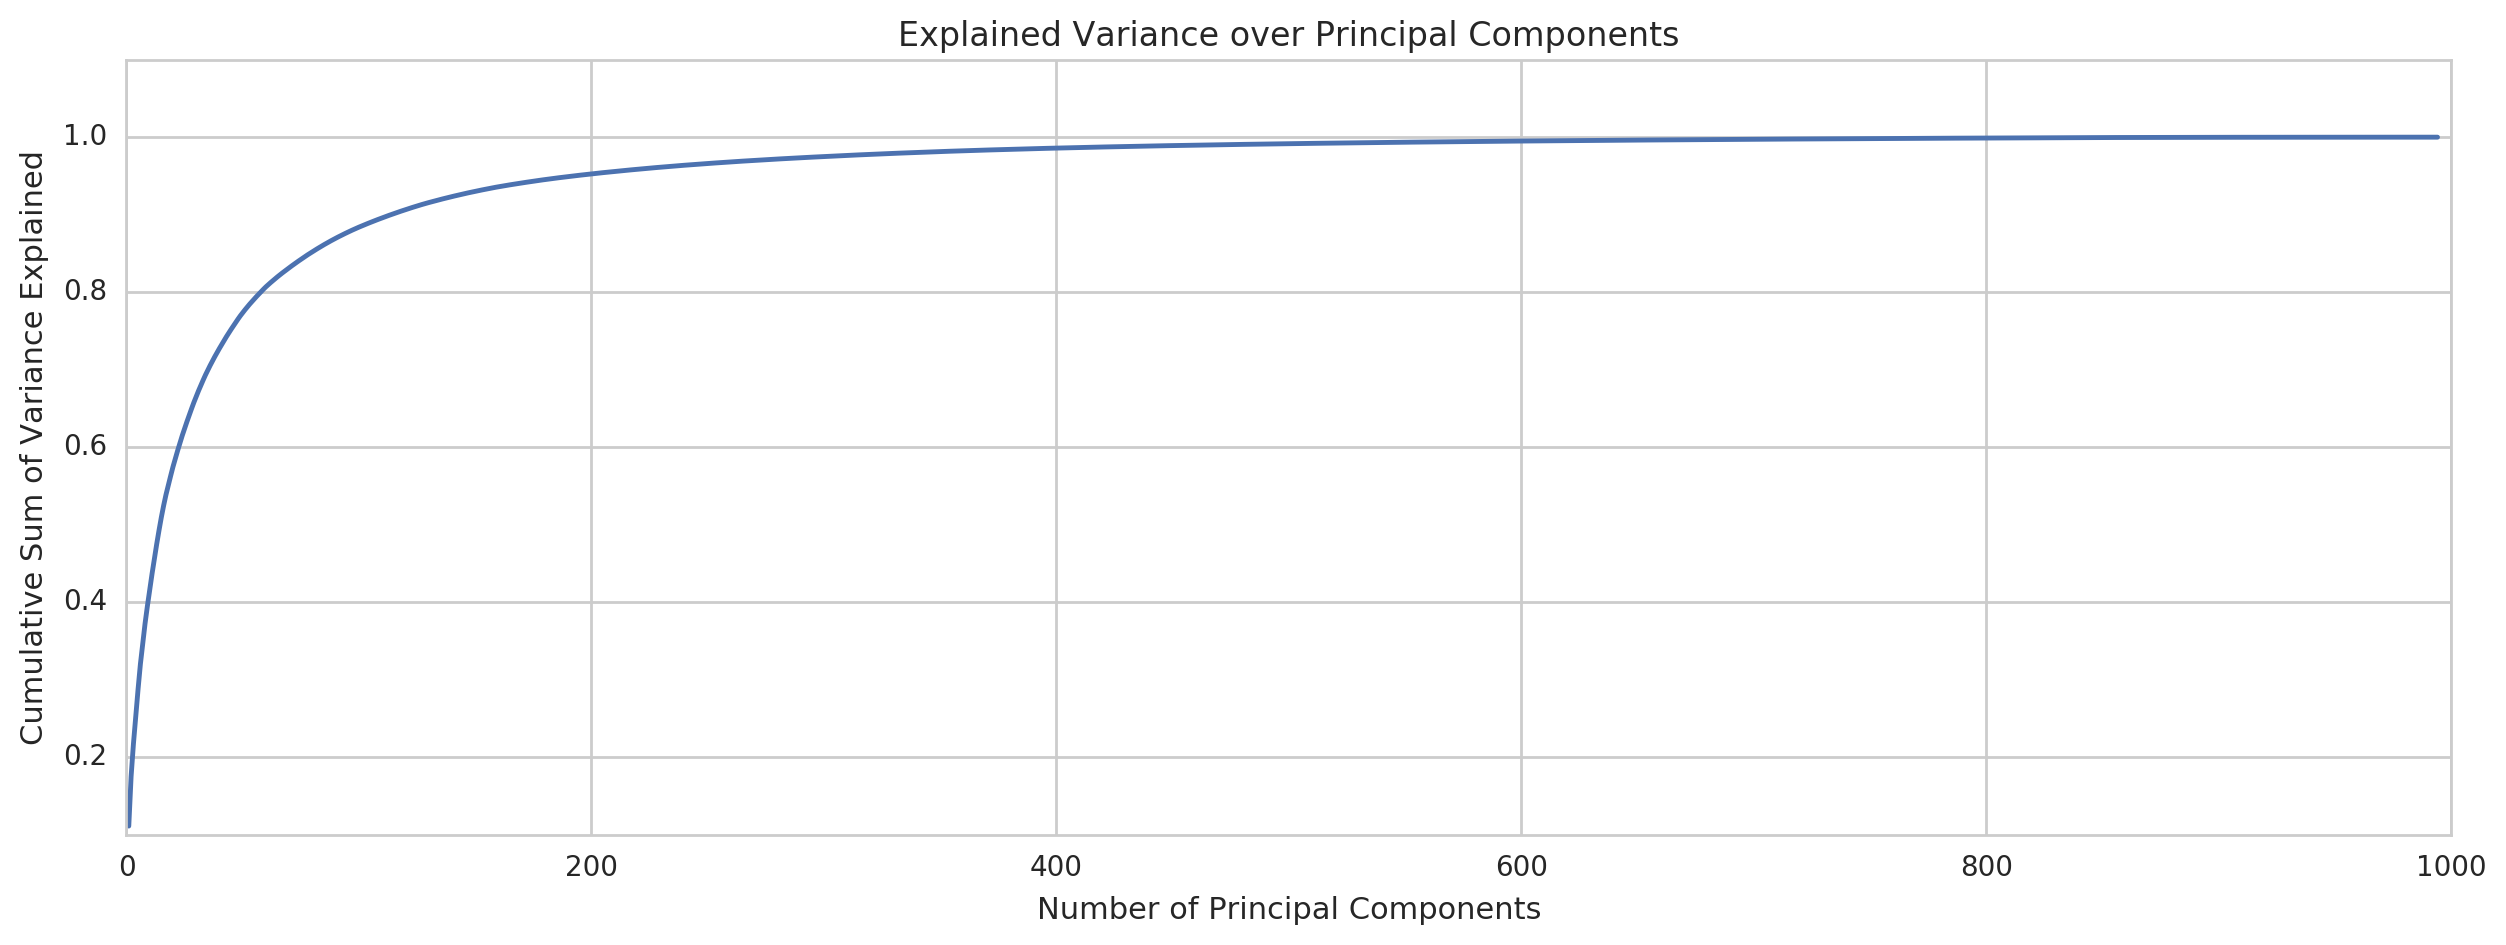

In [21]:
var_ratio = pca.explained_variance_ratio_
var_ratio = np.cumsum(var_ratio)
plot_cumsum_variance(var_ratio)

The above tells us that about 200 principal components justify 90% of the explained variance

#### Chi2

Here we look at individual importance by delivering a chi2 test

In [22]:
X_columns = list(X.columns) #Here we transfrom our variables into a list

#We then apply a chi2 statistical measure
skb_chi2 = SelectKBest(chi2, k=20)
skb_chi2.fit(X, y)

# examine results
top_15_chi2 = pd.DataFrame([X_columns, list(skb_chi2.scores_)], 
                     index=['feature','chi2 score']).T.sort_values('chi2 score', ascending=False)[:15]
top_15_chi2

,feature,chi2 score
443,C(weaptype1_txt)[T.Firearms],7707.91
413,C(attacktype1_txt)[T.Facility/Infrastructure A...,5969.68
438,C(targtype1_txt)[T.Utilities],5883.02
444,C(weaptype1_txt)[T.Incendiary],5617.04
290,C(country_txt)[T.Iraq],5259.6
84,natlty1_txt[Iraq],5242.94
411,C(attacktype1_txt)[T.Assassination],5140.15
992,property,3552.27
927,C(target1)[T.civilian],3220.23
431,C(targtype1_txt)[T.Private Citizens & Property],3170.68


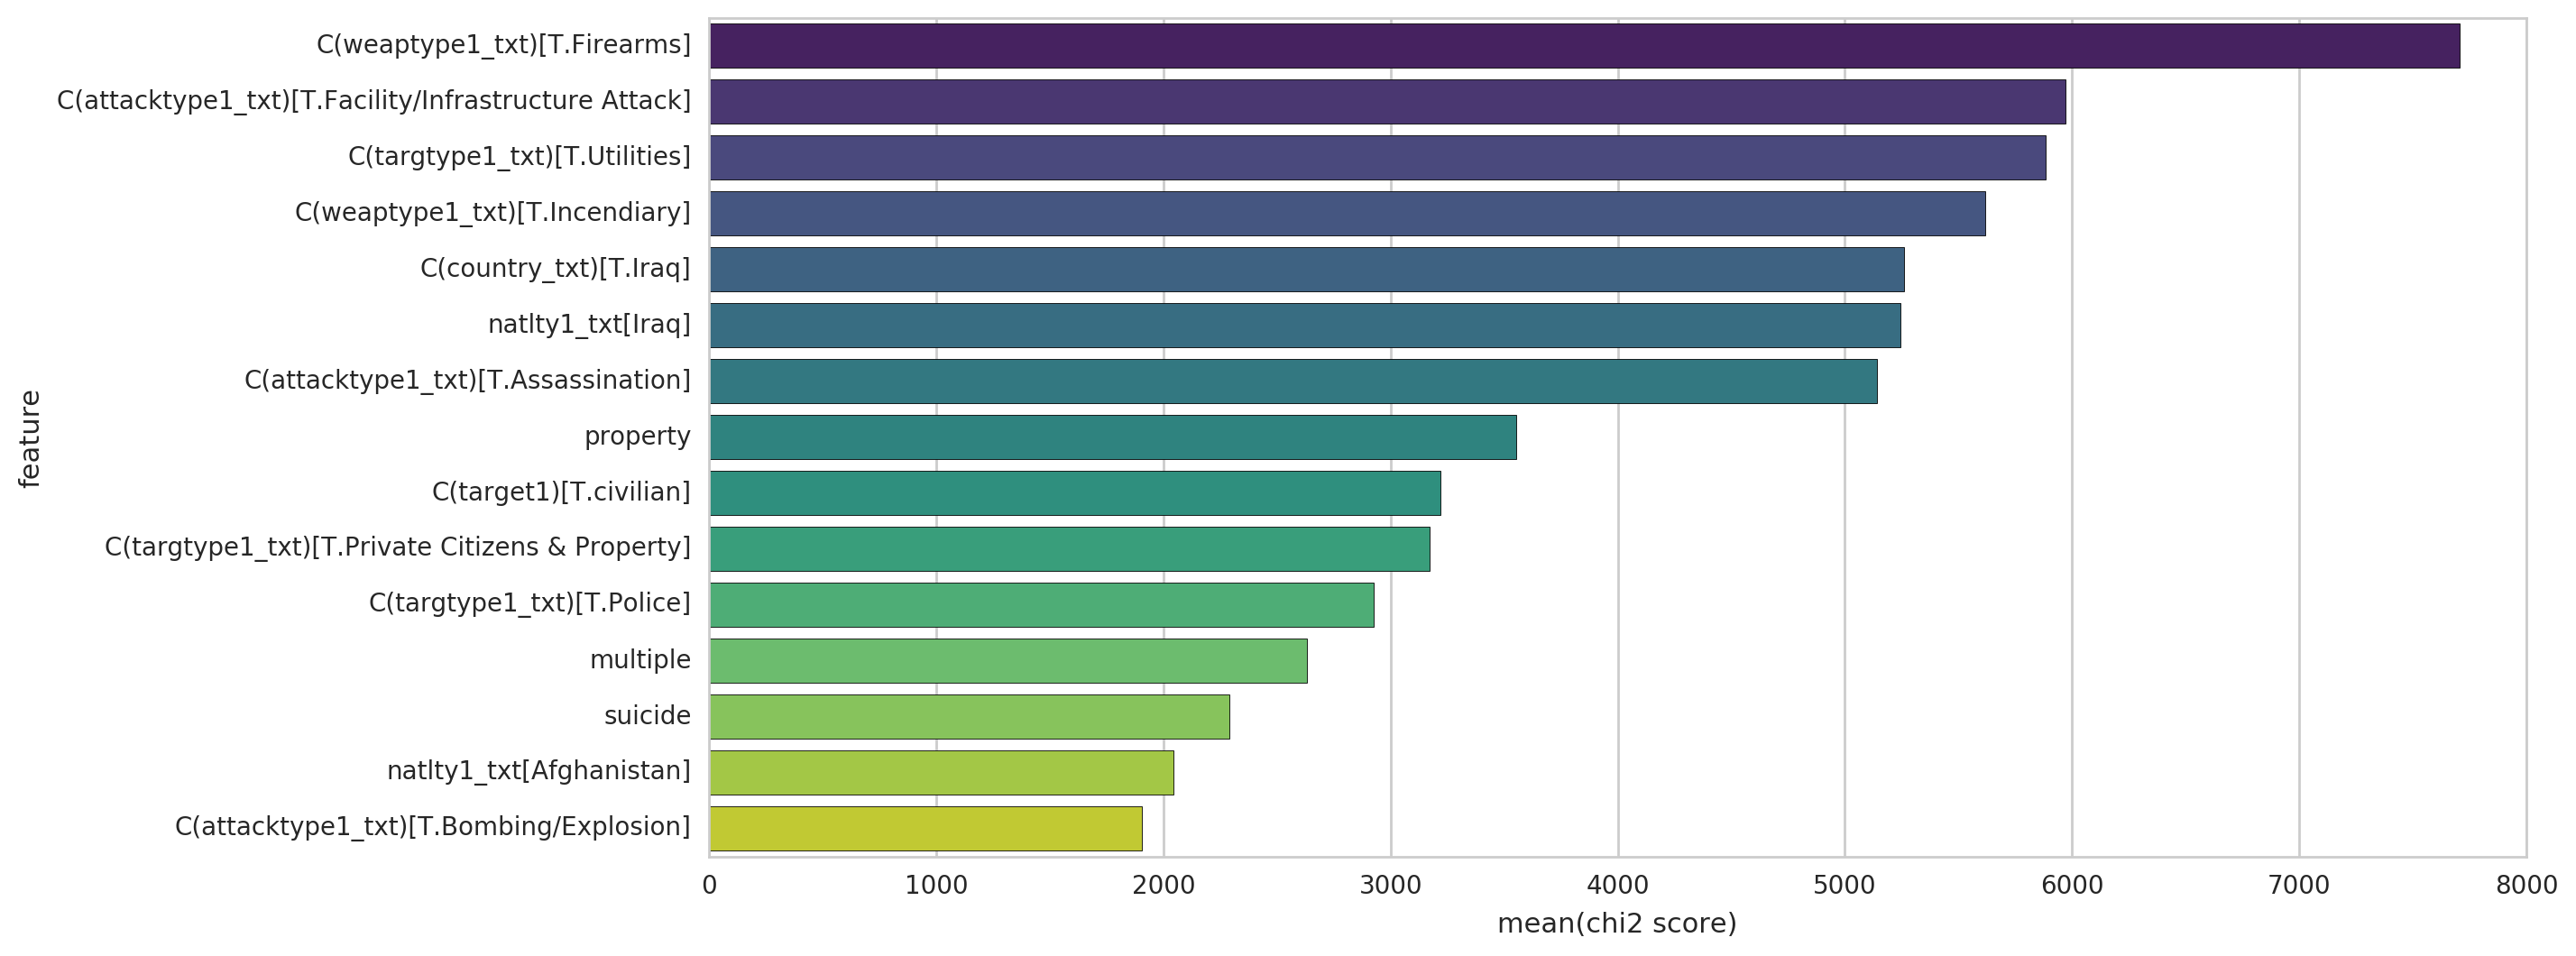

In [23]:
plt.figure(figsize=(13,6))

sns.barplot(x = top_15_chi2['chi2 score'], y = top_15_chi2.feature, palette= 'viridis')
plt.show()

### Scoring Metrics
[Table of Contents](#Table-of-Contents:)

In order to evaluate our model we simultaneously use two approaches:
- **Train-Test Splitting:** 
    
    Splitting our data into training and testing set allows us to train our model on one set and test its accuracy on the other.


- **Recall Scoring: **
    
    Given the nature of the data, we are better off predicting casualties and sending an ambulance when there is no casualties than not to do anything when there are. As such, we are trying to maximize our true positives and reduce our false negatives, hence trying to maximize our recall score!

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 102)

print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(94987, 994) (94987,) (23747, 994) (23747,)


### Model Selection
[Table of Contents](#Table-of-Contents:)

Let's get started! 


We start by creating a dictionary of models to test on our data.

In [25]:
vanilla_models = { 
    
    # Linear Models
    'Logistic Regression' : LogisticRegression(n_jobs = -1, random_state = 56, penalty = 'l1'),
    'Perceptron' : Perceptron(n_iter = 20, n_jobs = -1, random_state= 56),
    'SGD Classifier' : SGDClassifier(penalty = 'l1', n_jobs = -1, random_state= 56),
    
    # Support Vector Machine
    'Linear SVC' : LinearSVC(penalty = 'l1', random_state = 56, dual = False),
    
    # Naive Bayes:
    'Gaussian Naive-Bayes' : GaussianNB(),
    
    # Decision Tree & Ensemble
    'Decision Tree Classifier' : DecisionTreeClassifier(random_state= 56),
    'Random Forest Classifier': RandomForestClassifier(n_jobs = -1, random_state= 56),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(random_state= 56),
    'AdA Boost Classifier': AdaBoostClassifier(random_state = 56),
    'Bagging Classifier' : BaggingClassifier(random_state= 56, n_jobs = -1),
    
    # K-Nearest Neighbor:
    
    # Multi-Layer Perceptron (Neural Network):
    'MLP Classifier' : MLPClassifier(activation = 'logistic', random_state = 56, max_iter=400),  
    
}

We now instantiate a pipeline to fit our models with our training data

In [26]:
score_table = pd.DataFrame(columns = ['model', 'cv_10'])


for model, n in zip(vanilla_models, np.arange(len(vanilla_models))):
                    
    clf = Pipeline([
          ('classification', vanilla_models[model]),
        ])
    
    clf.fit(X_train, y_train)
    
    cv_10 = cross_val_score(clf, X_test, y_test, cv = 10, scoring = 'recall').mean()
    
    score_table.loc[n,'model'] = model
    score_table.loc[n,'cv_10'] = cv_10

In [27]:
score_table.sort_values(by = 'cv_10', ascending = False)

,model,cv_10
10,Gaussian Naive-Bayes,0.928968
3,SGD Classifier,0.88618
5,Linear SVC,0.870128
8,Logistic Regression,0.86604
2,MLP Classifier,0.865385
1,Gradient Boosting Classifier,0.855746
6,AdA Boost Classifier,0.852972
4,Random Forest Classifier,0.849467
7,Bagging Classifier,0.841364
0,Decision Tree Classifier,0.827859


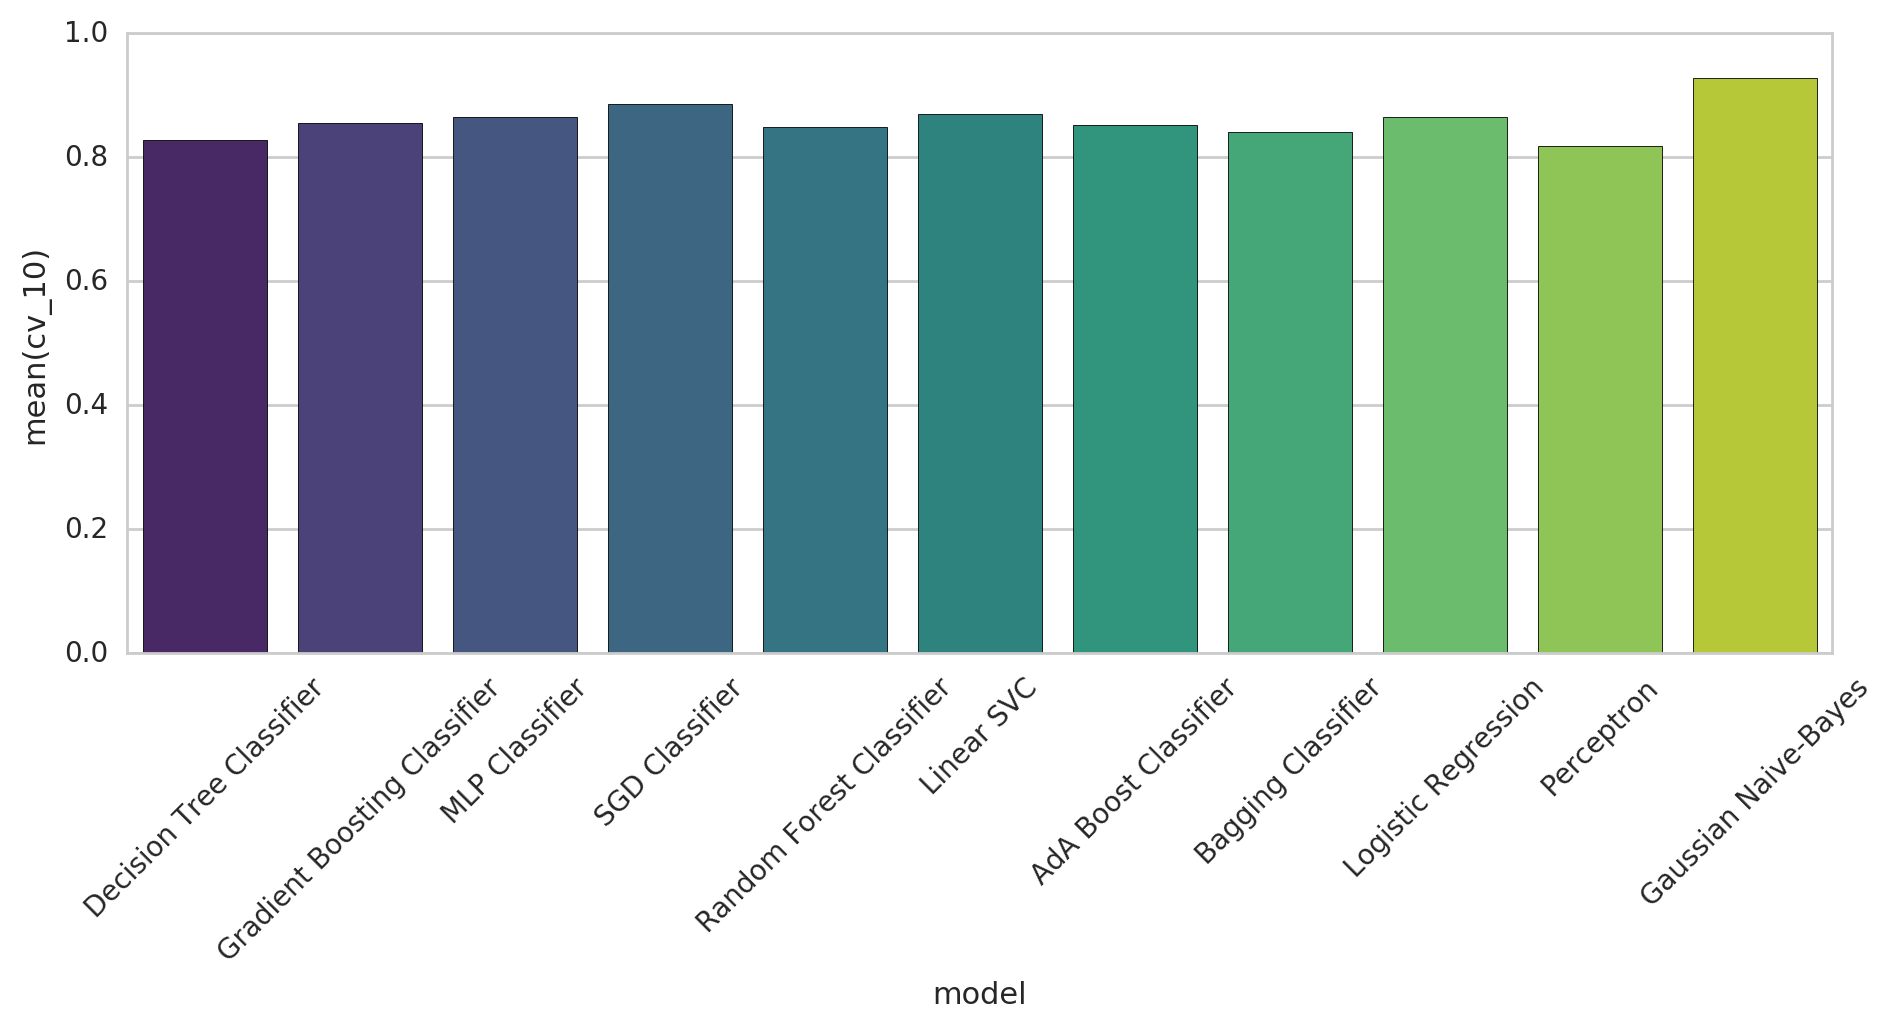

In [28]:

plt.figure(figsize = (11,4))
plt.xticks(rotation = 45, ha = 'center')
sns.barplot(score_table.model, score_table.cv_10, palette = 'viridis');


From the above, we can see that our top performers are:

- Logistic Regression

- SGD Classifier

- SVC Classification

- Random Forest Classifier

- Multi-Layer Perceptron

---
# IV - Predictive Analysis
[Table of Contents](#Table-of-Contents:)

## Model Calibration


### Logistic Regression
[Table of Contents](#Table-of-Contents:)

The first model we will be trying to improve is the traditional logistic regression. It is one of sklearn's linear models.

We use a GridSearchCV process in order to iterate over different hyper-parameters, which can sometimes bring quite significant improvements over our model performance.

In our case, we will iterate over different regularization strengths.

We start by defining our model and the hyper-parameters we want to search through.

In [29]:
lr = LogisticRegression(random_state = 56, n_jobs = -1, penalty = 'l1')

lr_params = {
    'C': np.linspace(0.001, 1, 20),
}

We define our GridSearchCV with recall-scoring and five cross-validations

In [30]:
lr_grid = GridSearchCV(lr, lr_params, scoring = 'recall', cv = 5, n_jobs = -1, error_score = 0)

Finally we fit the model, this is where everything happens. The model uses the training set in order to define the best optimization

In [31]:
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=0,
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=56, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.001  ,  0.05358,  0.10616,  0.15874,  0.21132,  0.26389,
        0.31647,  0.36905,  0.42163,  0.47421,  0.52679,  0.57937,
        0.63195,  0.68453,  0.73711,  0.78968,  0.84226,  0.89484,
        0.94742,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

We print the results of the search

In [32]:
lr_best_estimator = lr_grid.best_estimator_

print 'best estimator: \n', lr_grid.best_estimator_

print '\naccuracy_score: \n', lr_grid.score(X_test, y_test)

print '\nbest_params: \n', lr_grid.best_params_

Stored 'lr_best_estimator' (LogisticRegression)
best estimator: 
LogisticRegression(C=0.73710526315789471, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l1', random_state=56,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

accuracy_score: 
0.872463133304

best_params: 
{'C': 0.73710526315789471}


Let's look at the results table from the grid search to see how different values of C influence our test score

In [33]:
lr_results = pd.DataFrame(lr_grid.cv_results_).sort_values(by = 'param_C')

In [34]:
lr_results.head(3)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.995147,0.036588,0.841589,0.841589,0.001,{u'C': 0.001},20,0.840812,0.841920,0.836352,0.842853,0.843997,0.841237,0.844802,0.840535,0.841981,0.841400,0.047934,0.008048,0.002977,0.000772
1,6.547533,0.048310,0.862851,0.863925,0.0535789,{u'C': 0.0535789473684},19,0.861837,0.864334,0.862565,0.862854,0.865295,0.864902,0.862370,0.863950,0.862188,0.863586,2.096283,0.017752,0.001245,0.000691
2,4.544214,0.025804,0.865837,0.867775,0.106158,{u'C': 0.106157894737},18,0.863657,0.868611,0.866570,0.867587,0.869300,0.867474,0.864282,0.867499,0.865374,0.867704,2.185248,0.002915,0.001996,0.000426


Plotting the relationship betweeen C strength and mean_test_score

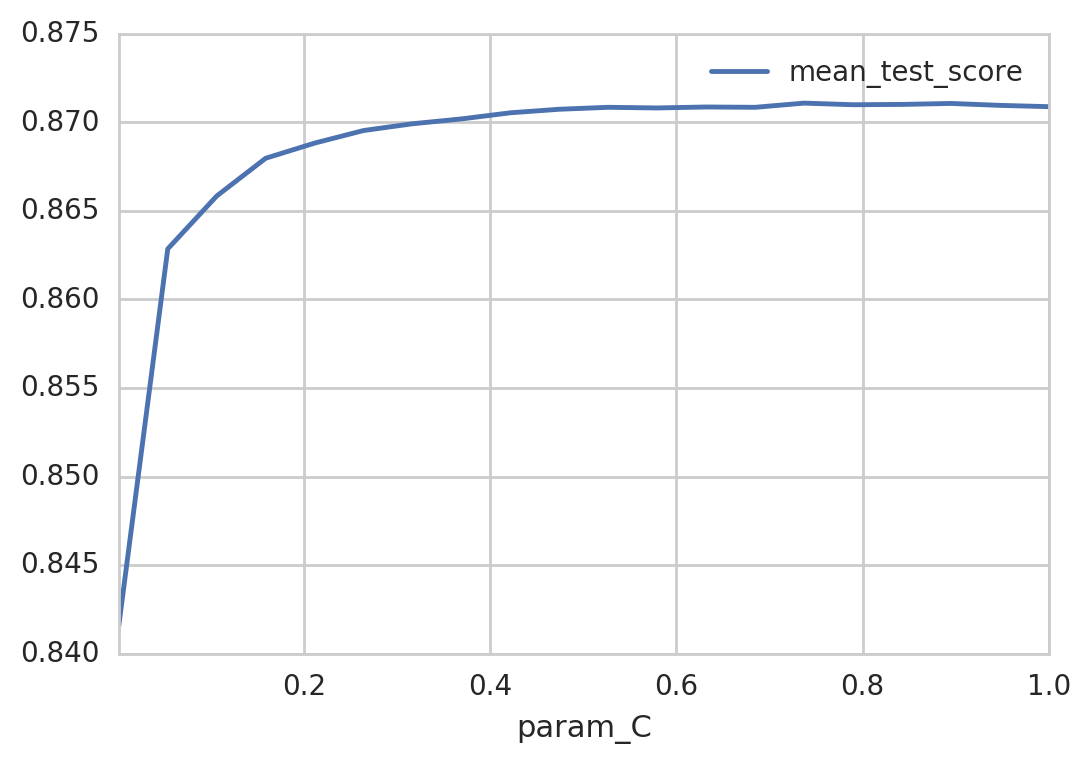

In [36]:
lr_results.plot(x ='param_C', y = 'mean_test_score');

In [37]:
lr_score = cross_val_score(lr_grid.best_estimator_, X_test, y_test, cv = 10, scoring = 'recall').mean()
lr_score

0.86552894381854739

LogisticRegression(C=0.89484210526315788, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l1', random_state=56,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [53]:
# lr_coef = pd.DataFrame(lr_best_estimator.coef_, columns = X.columns).T.sort_values(by = 0, ascending = False).rename(columns = {0: 'coef'})

In [54]:
# sns.barplot(x=lr_coef[:10].coef, y=lr_coef[:10].index)

(994, 1)

### SGD Classifier
[Table of Contents](#Table-of-Contents:)

In [39]:
sgd = SGDClassifier(random_state = 56, n_jobs = -1, n_iter = 200, penalty = 'elasticnet', l1_ratio = 0.01)

sgd_params = {

    'alpha' : np.logspace(-5,0, 10)
    
}

In [40]:
sgd_grid = GridSearchCV(sgd, sgd_params, cv = 5, scoring = 'recall', n_jobs = -1, error_score = 0)

In [41]:
sgd_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=0,
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.01,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=-1,
       penalty='elasticnet', power_t=0.5, random_state=56, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([  1.00000e-05,   3.59381e-05,   1.29155e-04,   4.64159e-04,
         1.66810e-03,   5.99484e-03,   2.15443e-02,   7.74264e-02,
         2.78256e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [42]:
sgd_best_estimator = sgd_grid.best_estimator_ 

print sgd_grid.best_estimator_
print
print sgd_grid.score(X_test, y_test)
print 
print sgd_grid.best_params_

Stored 'sgd_best_estimator' (SGDClassifier)
SGDClassifier(alpha=1.0, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.01,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=-1,
       penalty='elasticnet', power_t=0.5, random_state=56, shuffle=True,
       verbose=0, warm_start=False)

1.0

{'alpha': 1.0}


In [43]:
sgd_results = pd.DataFrame(sgd_grid.cv_results_).sort_values(by = 'param_alpha')

In [44]:
sgd_results.head(3)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,181.680157,0.086798,0.866710,0.871475,1e-05,{u'alpha': 1e-05},6,0.862656,0.870728,0.858833,0.862627,0.873760,0.873254,0.861733,0.869638,0.876570,0.881130,1.349025,0.019291,0.007073,0.005977
1,183.310024,0.055544,0.875157,0.880049,3.59381e-05,{u'alpha': 3.5938136638e-05},3,0.875671,0.882811,0.870392,0.875711,0.883135,0.883334,0.872656,0.879059,0.873930,0.879332,0.739196,0.023308,0.004344,0.002783
2,180.705267,0.054444,0.873846,0.877278,0.000129155,{u'alpha': 0.000129154966501},4,0.873669,0.879466,0.871575,0.874710,0.879130,0.878100,0.871655,0.877147,0.873202,0.876965,1.000370,0.025010,0.002768,0.001560


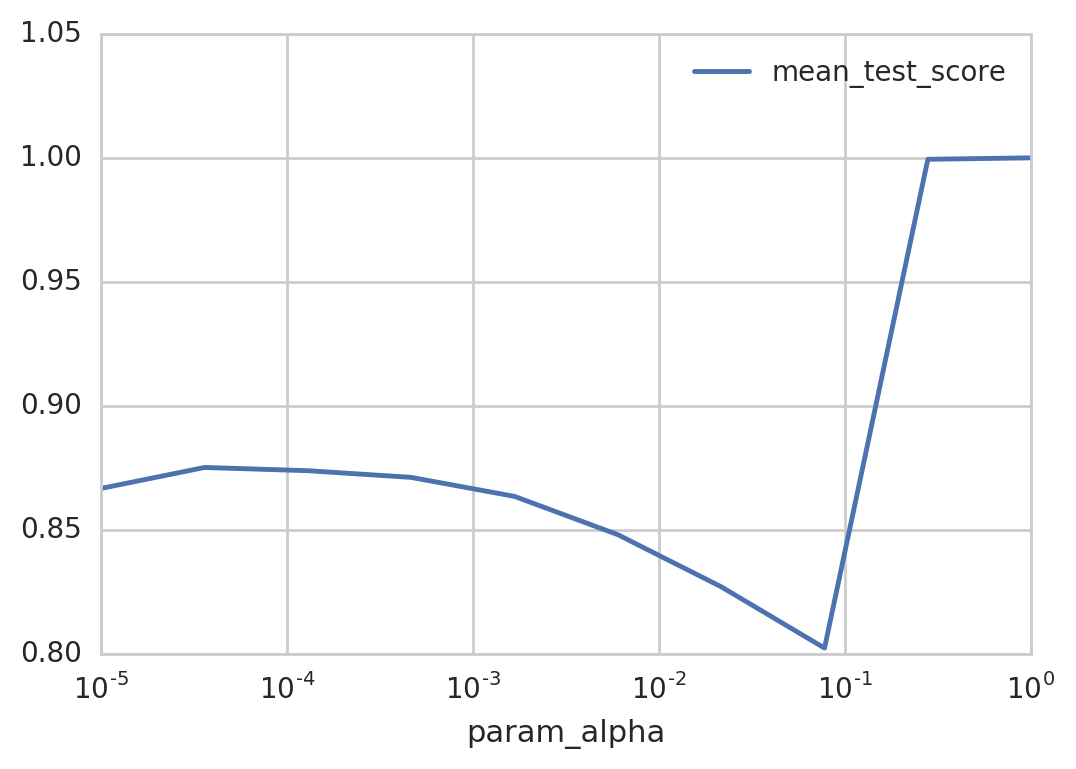

In [45]:
sgd_results.plot(x= 'param_alpha', y = 'mean_test_score', logx=True);

***We are clearly over-fitting here!***

In [46]:
sgd_score = cross_val_score(sgd_grid.best_estimator_, X_test, y_test, cv = 10, scoring = 'recall', n_jobs = -1).mean()
sgd_score

1.0

Stored 'sgd_results' (DataFrame)


### Linear SVC
[Table of Contents](#Table-of-Contents:)

Support Vector Machines can be very useful as they allow classification of non-linearly seperable data.

Here is an example of linearly and non-linearly seperable data

![SVM Example](./Assets/SVM_example.png)

Given the size of our dataset, we are constrained to the LinearSVC, which is a liblinear (large linear classification) implementation of the traditional SVC


In [48]:
svm = LinearSVC(random_state = 56, penalty = 'l1', dual = False)
svm_params = {
    
    'C': np.linspace(0.001, 10, 15),
    
}

In [49]:
svm_grid = GridSearchCV(svm, svm_params, cv = 5, scoring = 'recall', n_jobs = -1, error_score = 0)

In [50]:
warnings.filterwarnings('ignore')

svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=0,
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=56, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-03,   7.15214e-01,   1.42943e+00,   2.14364e+00,
         2.85786e+00,   3.57207e+00,   4.28629e+00,   5.00050e+00,
         5.71471e+00,   6.42893e+00,   7.14314e+00,   7.85736e+00,
         8.57157e+00,   9.28579e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [51]:
warnings.filterwarnings('default')

In [52]:
svm_best_estimator = svm_grid.best_estimator_
%store svm_best_estimator
print svm_grid.best_estimator_
print
print svm_grid.score(X_test, y_test)

print svm_grid.best_params_

Stored 'svm_best_estimator' (LinearSVC)
LinearSVC(C=0.7152142857142858, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l1', random_state=56,
     tol=0.0001, verbose=0)

0.873996203825
{'C': 0.7152142857142858}


In [53]:
svm_results = pd.DataFrame(svm_grid.cv_results_).sort_values(by = 'param_C')

In [54]:
svm_results.head(3)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.498053,0.036434,0.846522,0.846727,0.001,{u'C': 0.001},15,0.844817,0.846038,0.844999,0.846402,0.851825,0.849565,0.845440,0.845678,0.845531,0.845951,0.212783,0.006070,0.002665,0.001438
1,8.693589,0.063767,0.872081,0.876126,0.715214,{u'C': 0.715214285714},1,0.871484,0.877782,0.872941,0.876257,0.876217,0.875415,0.869106,0.875600,0.870654,0.875577,1.179701,0.024932,0.002412,0.000877
2,9.513613,0.031149,0.871480,0.876190,1.42943,{u'C': 1.42942857143},2,0.870665,0.877896,0.872486,0.876348,0.875125,0.874960,0.868196,0.876078,0.870927,0.875668,0.360965,0.005745,0.002283,0.000973


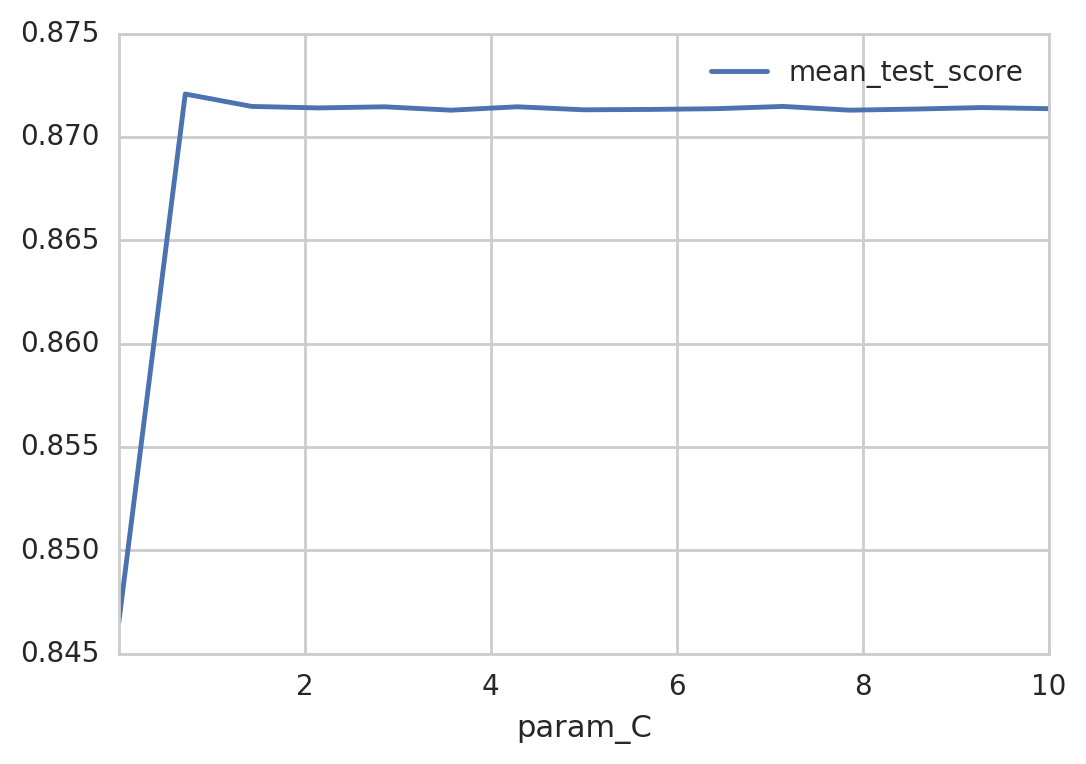

In [55]:
svm_results.plot(x = 'param_C', y = 'mean_test_score');

In [56]:
svm_score = cross_val_score(svm_grid.best_estimator_, X_test, y_test, scoring = 'recall', cv = 10, n_jobs = -1).mean()
svm_score

0.86932499080259995

In [57]:
%store svm_score
%store svm_results

Stored 'svm_score' (float64)
Stored 'svm_results' (DataFrame)


### Random Forest Classifier
[Table of Contents](#Table-of-Contents:)

In [59]:
rf = RandomForestClassifier(random_state = 56, n_jobs = -1, n_estimators= 300)

rf_params = {
    
    'criterion': ['gini','entropy'],
    'max_features' : ['auto', 'sqrt'],
    
    
}

In [72]:
rf_grid = GridSearchCV(rf, rf_params, scoring = 'recall', cv = 5, n_jobs = -1, error_score= 0)

In [73]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=0,
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=False, random_state=56,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [74]:
rf_best_estimator =rf_grid.best_estimator_
print rf_grid.best_estimator_
print
print rf_grid.score(X_test, y_test)
print
print rf_grid.best_params_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=False, random_state=56,
            verbose=0, warm_start=False)

0.880347495985

{'max_features': 'auto', 'criterion': 'entropy'}


In [75]:
rf_results = pd.DataFrame(rf_grid.cv_results_).sort_values(by = 'rank_test_score')

In [76]:
rf_results.head(3)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,504.196091,6.511203,0.873919,0.961935,entropy,auto,"{u'max_features': u'auto', u'criterion': u'ent...",1,0.870756,0.962704,0.873487,0.961566,0.876035,0.961271,0.872565,0.962318,0.876752,0.961818,11.341612,0.540971,0.002215,0.000516
3,325.466476,3.936794,0.873919,0.961935,entropy,sqrt,"{u'max_features': u'sqrt', u'criterion': u'ent...",1,0.870756,0.962704,0.873487,0.961566,0.876035,0.961271,0.872565,0.962318,0.876752,0.961818,98.743287,1.316283,0.002215,0.000516
0,490.839686,5.833970,0.873846,0.962004,gini,auto,"{u'max_features': u'auto', u'criterion': u'gini'}",3,0.871940,0.962727,0.873760,0.961657,0.875762,0.961316,0.873111,0.962341,0.874659,0.961977,15.570374,1.399969,0.001305,0.000496


In [77]:
%store rf_results
%store rf_best_estimator

Stored 'rf_results' (DataFrame)
Stored 'rf_best_estimator' (RandomForestClassifier)


In [78]:
rf_score = cross_val_score(rf_grid.best_estimator_, X_test, y_test, cv = 10, scoring = 'recall', n_jobs = -1).mean()
rf_score

0.86947012311186711

In [79]:
%store -r rf_best_estimator

### Multi-Layer Perceptron
[Table of Contents](#Table-of-Contents:)

In [114]:
mlp = MLPClassifier(

    hidden_layer_sizes= (40,), 
    activation = 'logistic',
    learning_rate = 'adaptive',
    learning_rate_init = 0.2,
    random_state = 56,
    max_iter = 500,    
    
)

mlp_params = {
#     'hidden_layer_sizes' : [10, 20, 30, 40, 50],
    'alpha' : np.logspace(-5,1,10),
    'solver' : ['adam', 'sgd'],
#     'solver' : ['adam','sgd'],
#     'learning_rate_init' : [0.2, 0.0001],
       
    }






In [115]:
mlp_grid = GridSearchCV(mlp, mlp_params, scoring = 'recall', cv = 5, n_jobs = -1, error_score= 0)

In [ ]:
# mlp_grid.fit(X_train, y_train)

In [118]:
print mlp_grid.best_estimator_
print mlp_grid.score(X_test, y_test)
print mlp_grid.best_params_

In [124]:
mlp_best_estimator = mlp_grid.best_estimator_
mlp_best_estimator

MLPClassifier(activation='logistic', alpha=1.0000000000000001e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(40,), learning_rate='adaptive',
       learning_rate_init=0.2, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=56, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [ ]:
%store mlp_best_estimator
%store mlp_results

In [127]:
mlp_results.sort_values(by = 'param_alpha', inplace = True, ascending = False)

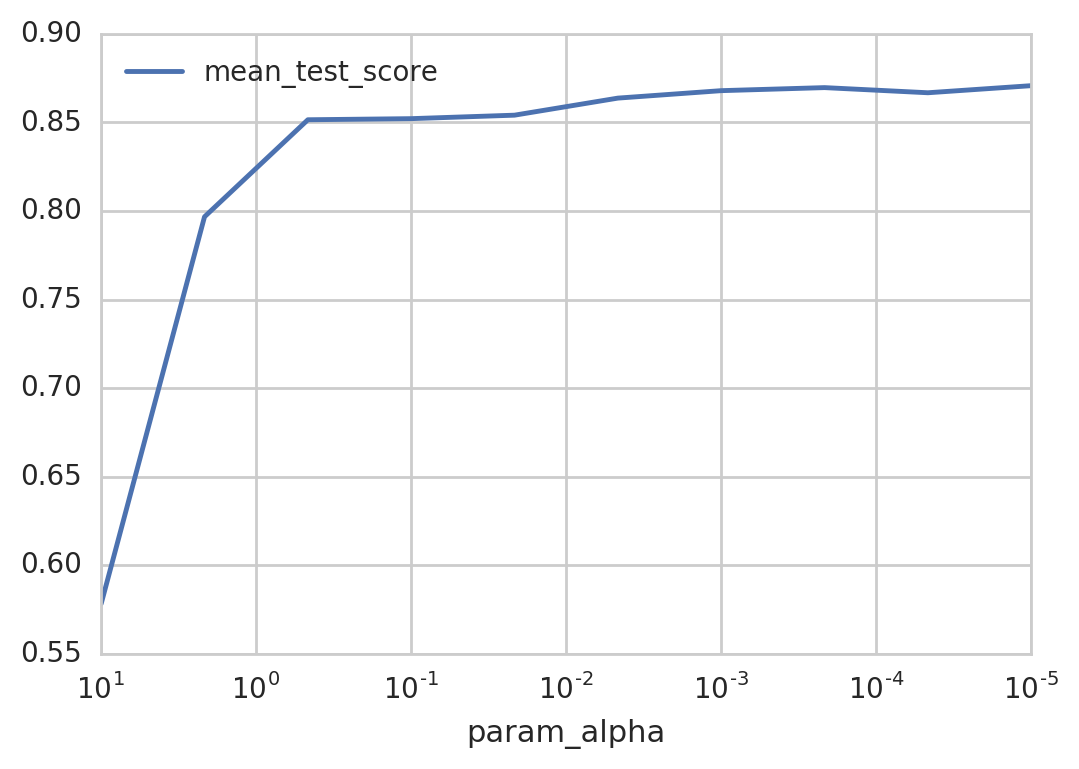

In [128]:
mlp_results[mlp_results.param_solver == 'adam'].plot(x = 'param_alpha', y = 'mean_test_score', logx = True);

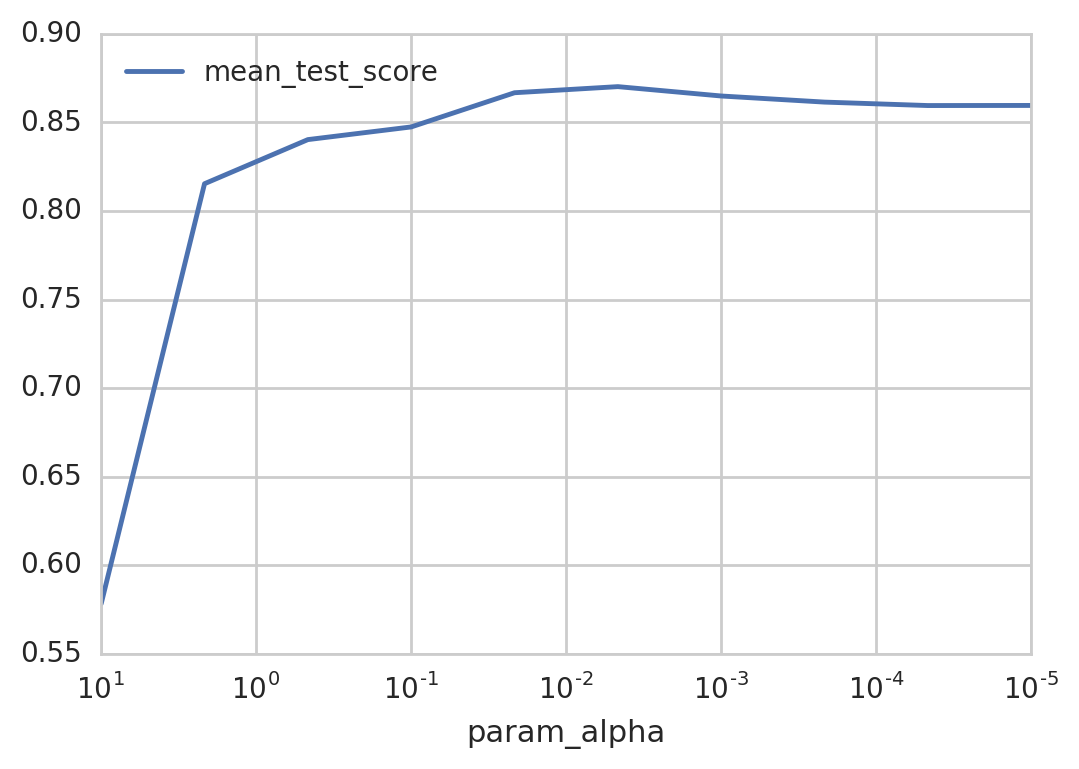

In [129]:
mlp_results[mlp_results.param_solver == 'sgd'].plot(x = 'param_alpha', y = 'mean_test_score', logx = True);

In [130]:
mlp_score = cross_val_score(mlp_best_estimator, X_test, y_test, cv = 10, scoring = 'recall', n_jobs = -1).mean()
mlp_score

0.85071041252339352

ERROR:root:Line magic function `%mlp_score` not found.


## Performance Summary
[Table of Contents](#Table-of-Contents:)

### Score Table
[Table of Contents](#Table-of-Contents:)

In [136]:
score_table = pd.DataFrame(columns = ['model', 'cv_10_score'])
models = ['Logistic Regression', 'SGD Classifier', 'SVC Classifier', 'Random Forest Classifier', 'Multi-Layer Perceptron']
score_list = [lr_score, sgd_score, svm_score, rf_score,  mlp_score]

for model, n, score in zip(models, np.arange(len(models)), score_list):
    score_table.loc[n,'model'] = model
    score_table.loc[n,'cv_10_score'] = score           

In [137]:
score_table

,model,cv_10_score
0,Logistic Regression,0.865529
1,SGD Classifier,1
2,SVC Classifier,0.869325
3,Random Forest Classifier,0.86947
4,Multi-Layer Perceptron,0.85071


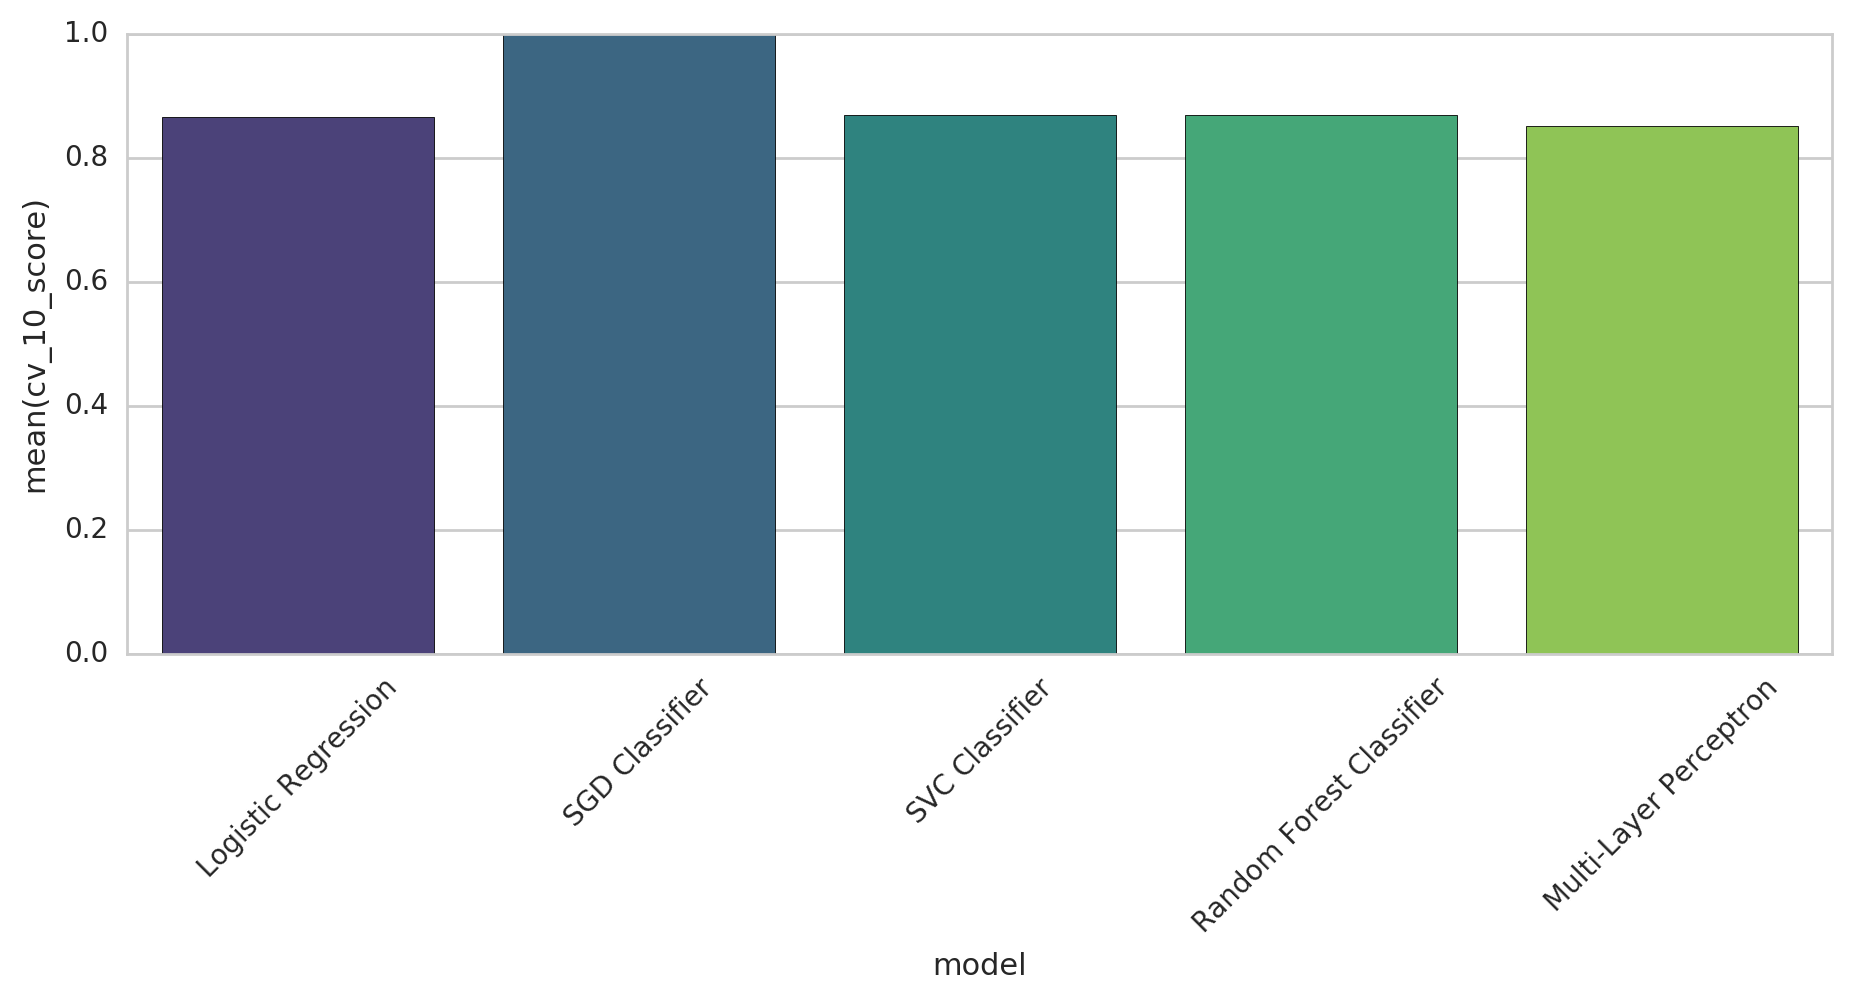

In [138]:

plt.figure(figsize = (11,4))
plt.xticks(rotation = 45, ha = 'center')
sns.barplot(score_table.model, score_table.cv_10_score, palette = 'viridis');


### Feature Coefficients
[Table of Contents](#Table-of-Contents:)

In [ ]:
#Rank by mean coefficient value across models
# coef_table = pd.DataFrame(zip(lasso.coef_[0],lr.coef_[0],X_train.columns), columns = ['Lasso_coef','Ridge_coef','Features'])
# coef_table.head(10)


### Confusion Matrices
[Table of Contents](#Table-of-Contents:)

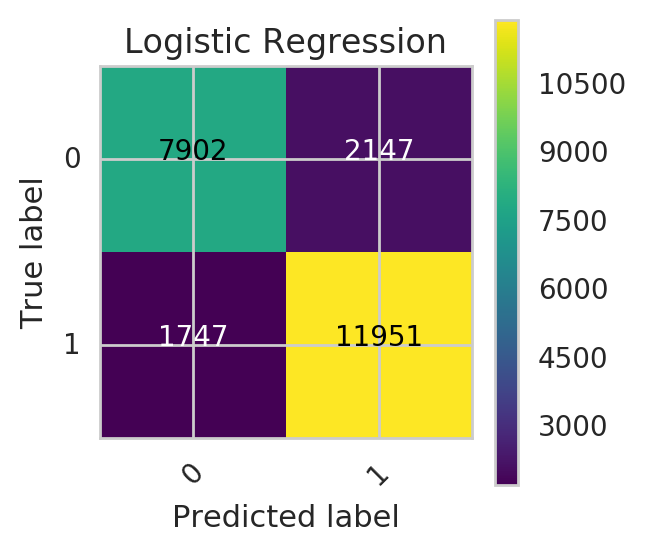

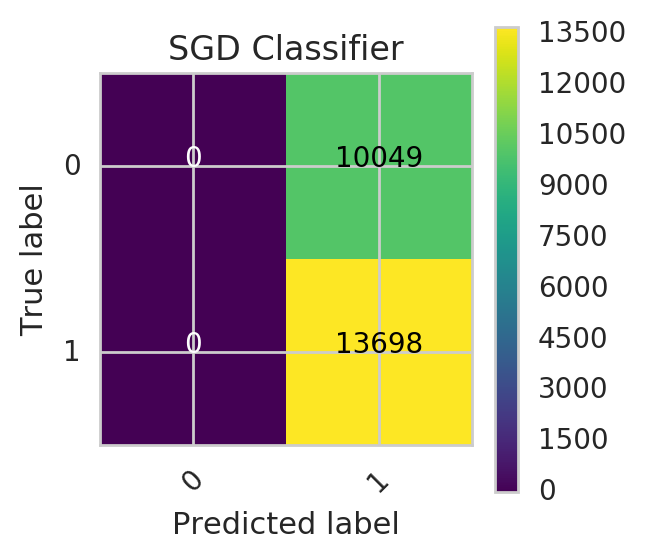

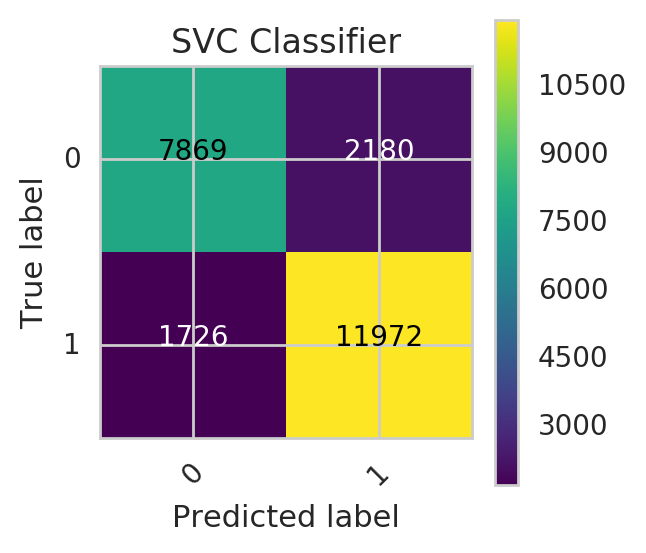

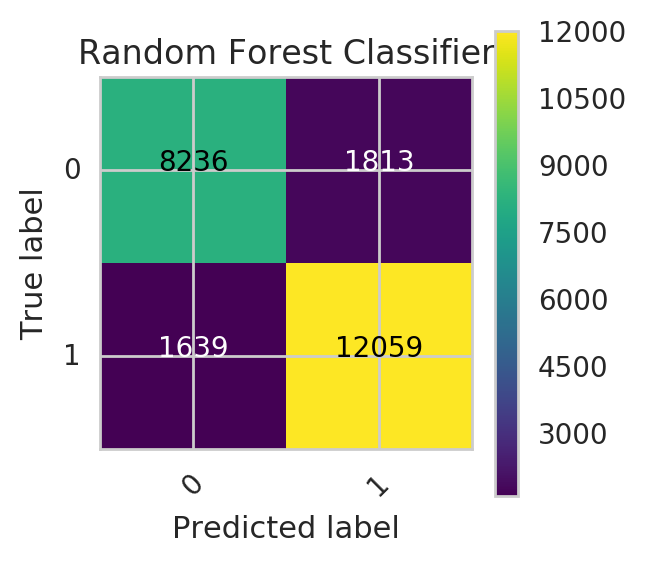

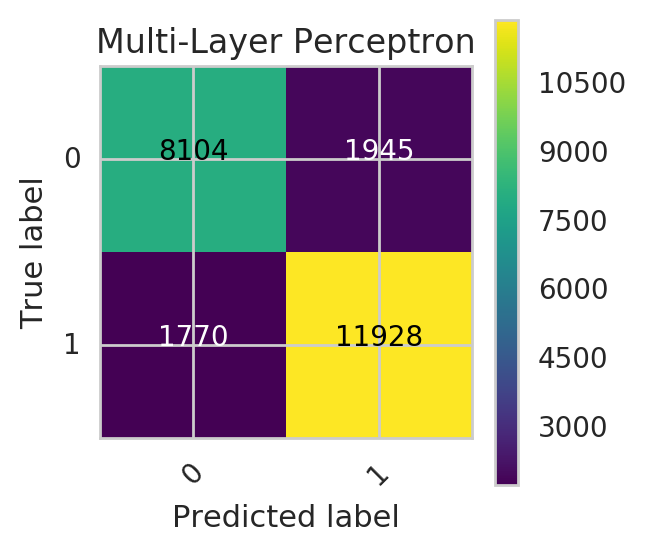

In [122]:
plot_confusion_matrix(confusion_matrix(y_test, lr_grid.best_estimator_.predict(X_test)), title = 'Logistic Regression', classes = np.array([0,1]))
plot_confusion_matrix(confusion_matrix(y_test, sgd_grid.best_estimator_.predict(X_test)), title = 'SGD Classifier', classes = np.array([0,1]))
plot_confusion_matrix(confusion_matrix(y_test, svm_grid.best_estimator_.predict(X_test)), title = 'SVC Classifier', classes = np.array([0,1]))
plot_confusion_matrix(confusion_matrix(y_test, rf_grid.best_estimator_.predict(X_test)), title = 'Random Forest Classifier', classes = np.array([0,1]))
plot_confusion_matrix(confusion_matrix(y_test, mlp_grid.best_estimator_.predict(X_test)), title = 'Multi-Layer Perceptron', classes = np.array([0,1]))


In [ ]:
plt.figure(1)
plot_confusion_matrix(confusion_matrix(y_test, lr_grid.best_estimator_.predict(X_test)), title = 'Logistic Regression', classes = np.array([0,1]))
plt.figure(2)
plot_confusion_matrix(confusion_matrix(y_test, sgd_grid.best_estimator_.predict(X_test)), title = 'SGD Classifier', classes = np.array([0,1]))

### ROC Curves
[Table of Contents](#Table-of-Contents:)

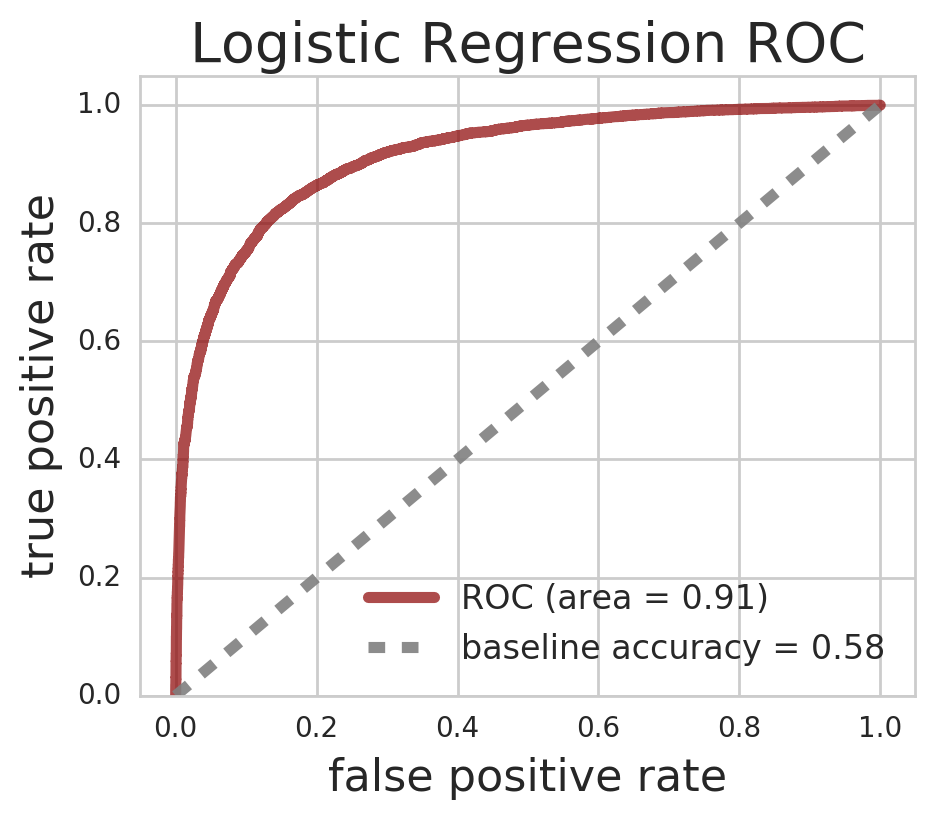

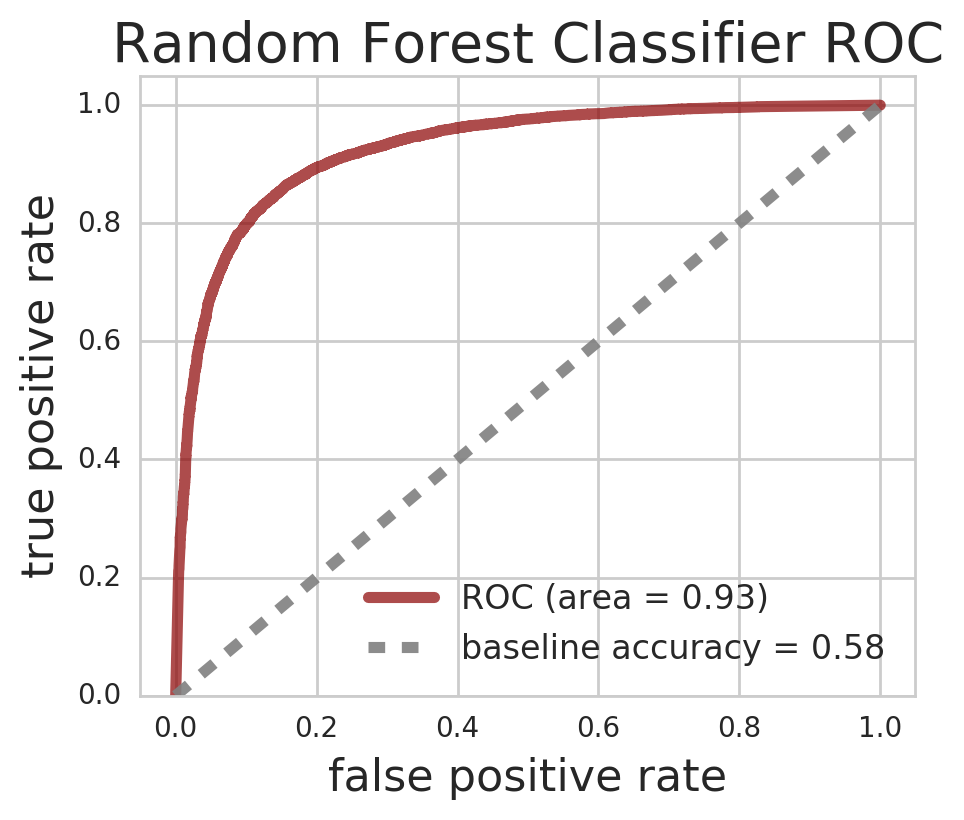

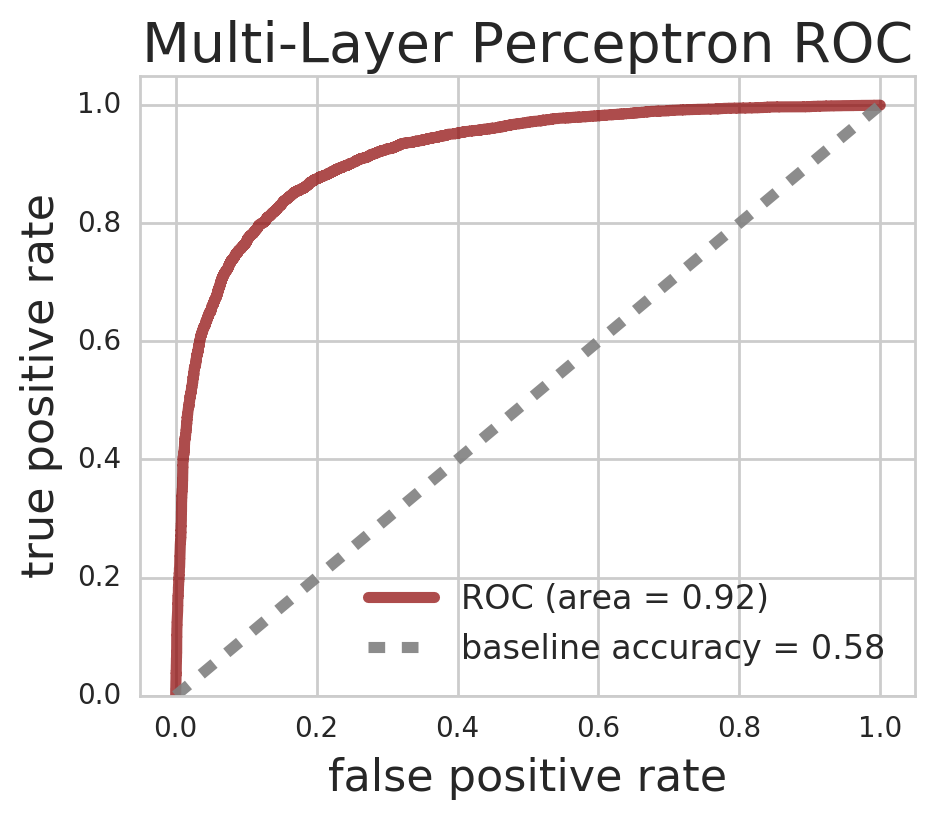

In [135]:
plot_roc(lr_grid.best_estimator_, 'Logistic Regression')
# plot_roc(sgd_grid.best_estimator_, 'SGD Classifier')
# plot_roc(svm_grid.best_estimator_, 'SVC Classifier')
plot_roc(rf_grid.best_estimator_, 'Random Forest Classifier')
plot_roc(mlp_best_estimator, 'Multi-Layer Perceptron')


# VII - Appendix
[Table of Contents](#Table-of-Contents:)

### Plot Confusion Matrix
[Table of Contents](#Table-of-Contents:)

In [70]:
def plot_confusion_matrix(cm, classes, title, cmap='viridis'):
    '''
    This function simply gives a nice loooking layout to the confusion matrix.
    '''
    plt.figure(figsize = (3,3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Plot Cummulative Sum Variance
[Table of Contents](#Table-of-Contents:)

In [13]:
def plot_cumsum_variance(var_ratio):
    '''
    This function plots cummulative explained variance, ranking features by PCA importance.
    '''
    fig = plt.figure(figsize=(15,5))#init figure 
    ax = fig.gca()
    
    x_vals = range(1,len(var_ratio)+1)#set x&y values
    y_vals = var_ratio
    
    ax.set_title('Explained Variance over Principal Components')#set title and labels 
    ax.set_ylabel('Cumulative Sum of Variance Explained')
    ax.set_xlabel('Number of Principal Components')
    
    ax.plot(x_vals, y_vals)

### Plot ROC Curve
[Table of Contents](#Table-of-Contents:)

In [132]:
def plot_roc(model, varname):
    y_pp = model.predict_proba(X_test)[:, 1]
    fpr_, tpr_, _ = roc_curve(y_test, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(5,4))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' ROC', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

In [3]:
# The end!

In [ ]:
# sns.distplot(data.year_salary,bins=60, color ="dimgrey",kde_kws={"color": "darkred", "lw": 1, "label": "KDE"})